# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

In [98]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util

import scipy

# Convolution
Hint: 
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


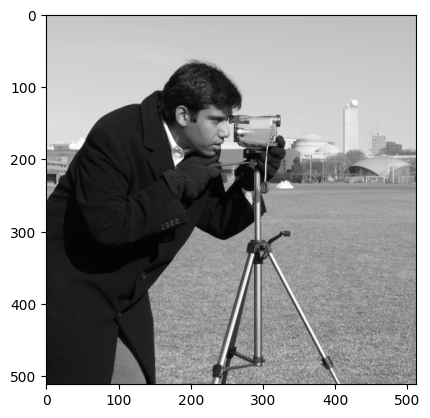

In [99]:
# solution

camera = data.camera()
plt.imshow(camera, cmap='gray')

In [100]:
h_mask_orig = np.ones((1, 15))

# As the ask is going to be applied to each pixel and we want 
# the intensity to keep in its original range, we need to normalize
# the mask so that the sum of all the elements is 1 (Isometry)
h_mask = h_mask_orig / h_mask_orig.sum()
print(h_mask)

[[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]]


Text(0.5, 1.0, 'Convolved Image (not normalized)')

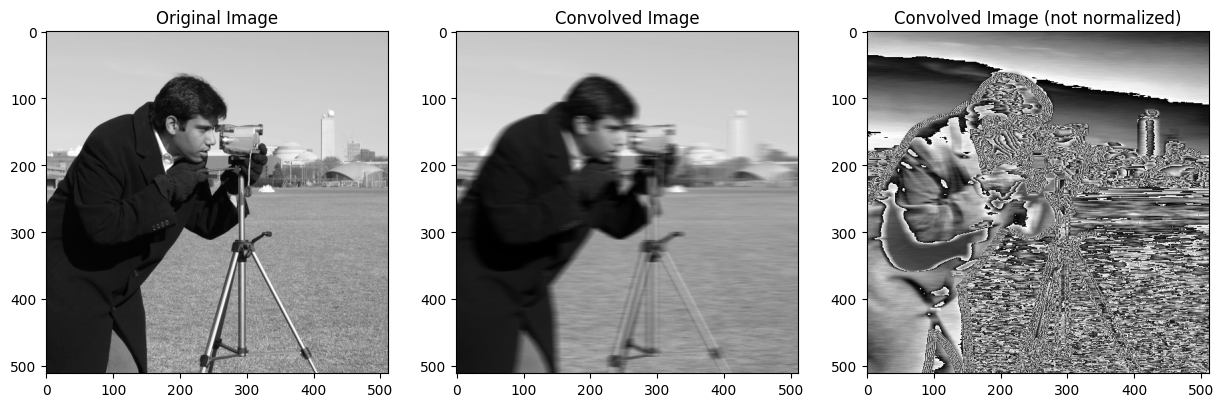

In [101]:
h_conv_img = scipy.ndimage.convolve(camera, h_mask)
h_conv_img_notnorm = scipy.ndimage.convolve(camera, h_mask_orig)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(camera, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(h_conv_img, cmap='gray')
ax[1].set_title('Convolved Image')
ax[2].imshow(h_conv_img_notnorm, cmap='gray')
ax[2].set_title('Convolved Image (not normalized)')

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

Text(0.5, 1.0, 'Convolved Image')

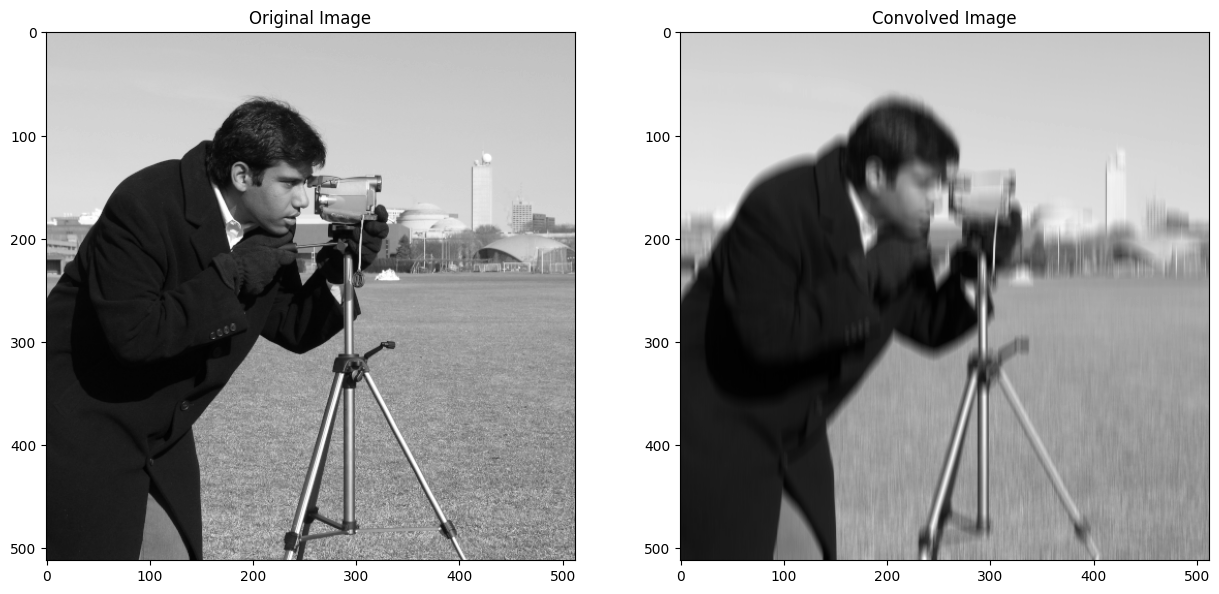

In [102]:
# solution

v_mask = np.ones((15, 1))
v_mask = v_mask / v_mask.sum()

v_conv_img = scipy.ndimage.convolve(camera, v_mask)
v_conv_img_notnorm = scipy.ndimage.convolve(camera, v_mask)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(camera, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(v_conv_img, cmap='gray')
ax[1].set_title('Convolved Image')

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

Text(0.5, 1.0, 'Convolved Image')

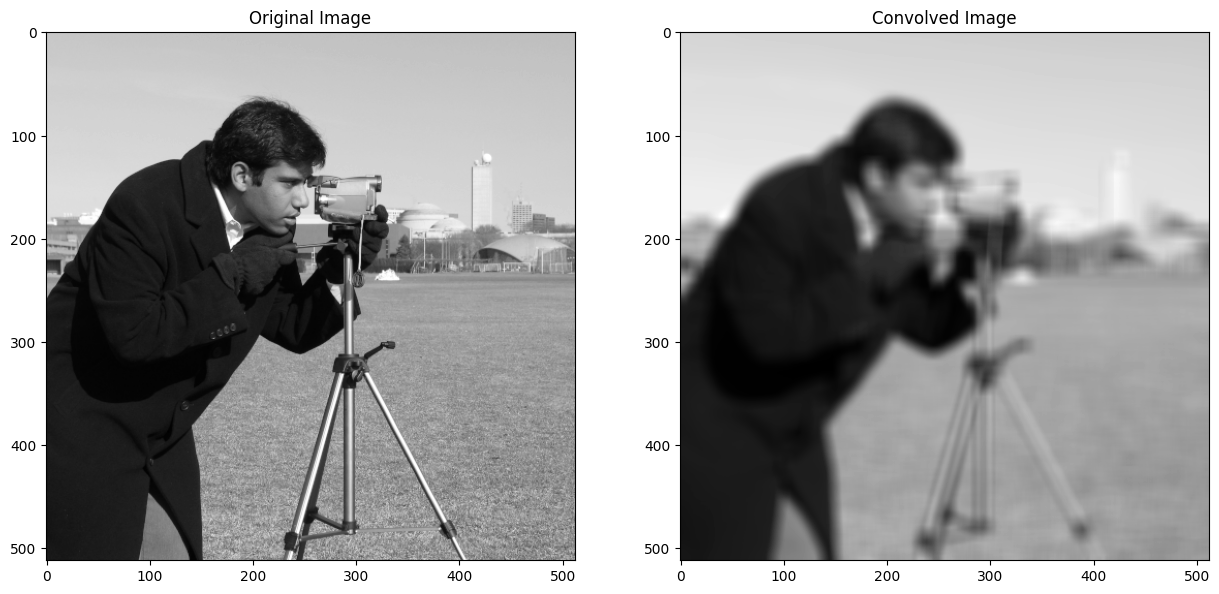

In [103]:
# solution

avg_mask = np.ones((15, 15))
avg_mask = avg_mask / avg_mask.sum()

avg_conv_img = scipy.ndimage.convolve(camera, avg_mask)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(camera, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(avg_conv_img, cmap='gray')
ax[1].set_title('Convolved Image')

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

Text(0.5, 1.0, 'Average Convolved Image')

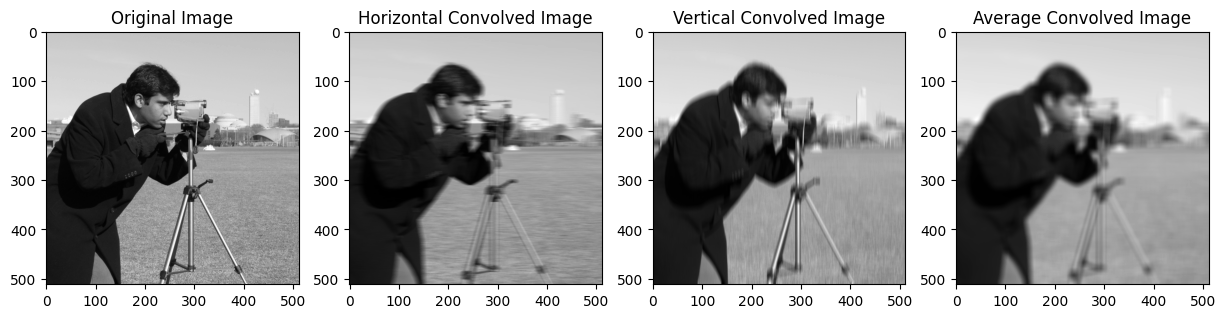

In [104]:
# solution

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(camera, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(h_conv_img, cmap='gray')
ax[1].set_title('Horizontal Convolved Image')
ax[2].imshow(v_conv_img, cmap='gray')
ax[2].set_title('Vertical Convolved Image')
ax[3].imshow(avg_conv_img, cmap='gray')
ax[3].set_title('Average Convolved Image')

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


Text(0.5, 1.0, 'Stage 2 Convolved Image')

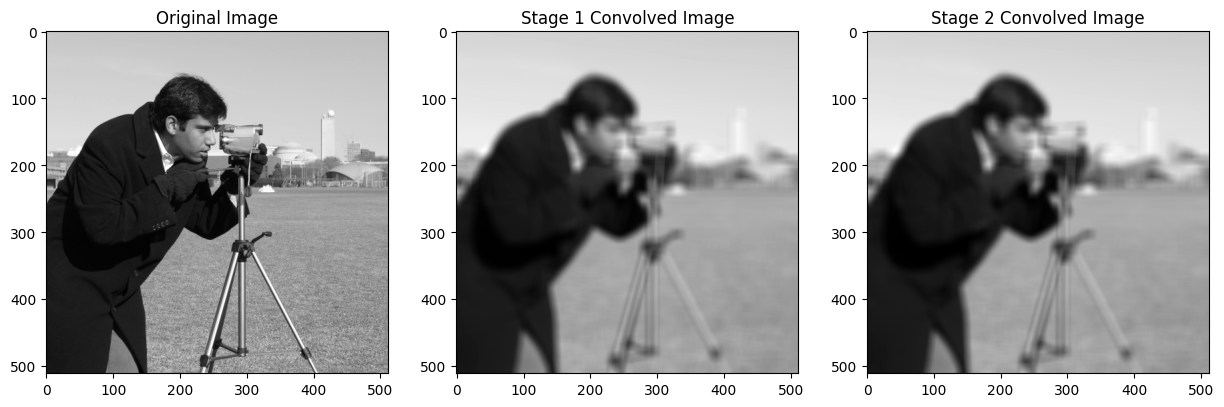

In [105]:
# solution
stage1_conv_img = scipy.ndimage.convolve(camera, h_mask)
stage2_conv_img = scipy.ndimage.convolve(stage1_conv_img, v_mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(camera, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(avg_conv_img, cmap='gray')
ax[1].set_title('Stage 1 Convolved Image')
ax[2].imshow(stage2_conv_img, cmap='gray')
ax[2].set_title('Stage 2 Convolved Image')

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

In [106]:
(avg_conv_img == stage2_conv_img).all()

False

Text(0.5, 1.0, 'Histogram of differences')

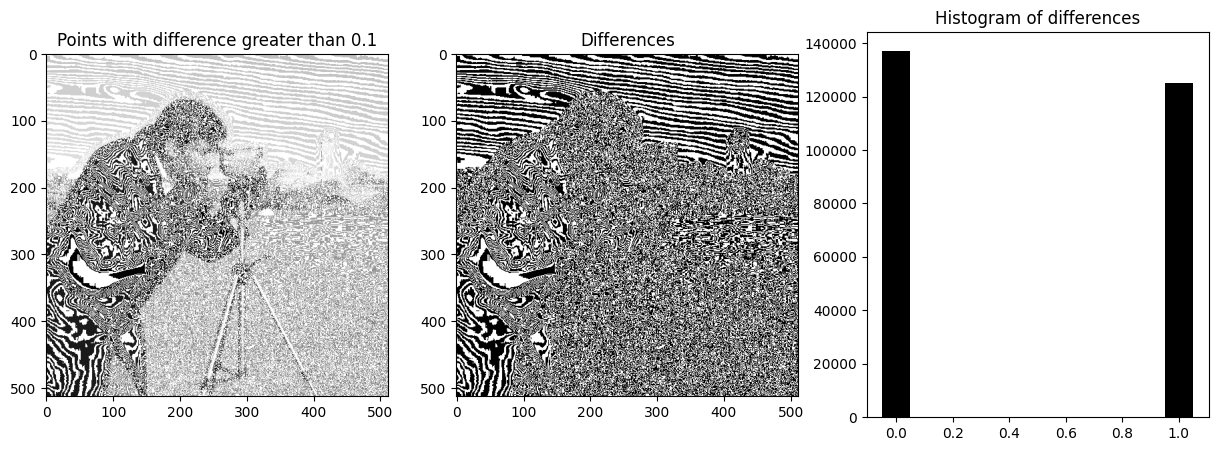

In [107]:
# show the pixels where the difference is greater than 0.1
diff = avg_conv_img - stage2_conv_img
camera_diff = camera.copy()
camera_diff[diff > .5] = 255.

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(camera_diff, cmap='gray')
ax[0].set_title('Points with difference greater than 0.1')
ax[1].imshow(diff, cmap='gray')
ax[1].set_title('Differences')
hist = exposure.histogram(diff, nbins=256)
ax[2].bar(hist[1], hist[0], width=.1, color='k')
ax[2].set_title('Histogram of differences')

**Solution**

For human eye, they are different but, if we compare the values of the pixels we can see that there are some differences. Values are slightly higher after 2D convolution is applied. This can be due to floating point errors in the 2 stage convolution given that more errors are carried.

Unlike this computational error, from the theoretical point of view, it should be the same given that the calculations are exactly the same: horizontal and vertical neighbors contribute in the same way (associative property of sum).

# Image Blurring

*   Why is blurring important?



**Solution**

Blurring is a way of removing, locally, noise contribution and detect changes in intensities.

Text(0.5, 1.0, 'Histogram of original image')

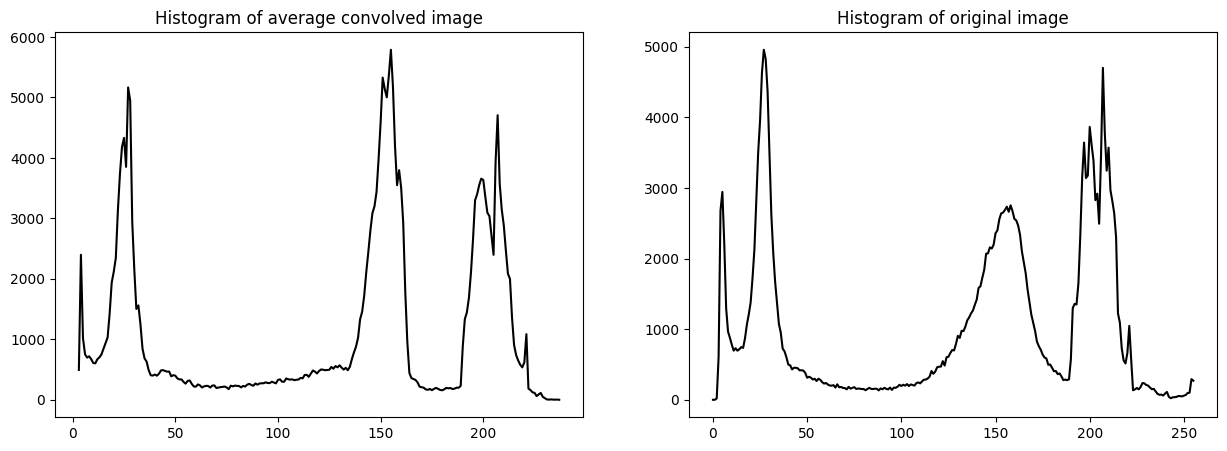

In [108]:
avg_conv_hist = exposure.histogram(avg_conv_img, nbins=256)
camera_hist = exposure.histogram(camera, nbins=256)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(avg_conv_hist[1], avg_conv_hist[0], color='k')
ax[0].set_title('Histogram of average convolved image')
ax[1].plot(camera_hist[1], camera_hist[0], color='k')
ax[1].set_title('Histogram of original image')

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

In [109]:
# solution
astronaut = data.astronaut()
astronaut = color.rgb2gray(astronaut)
gaussian_astronaut_s1 = filters.gaussian(astronaut, sigma=1)

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

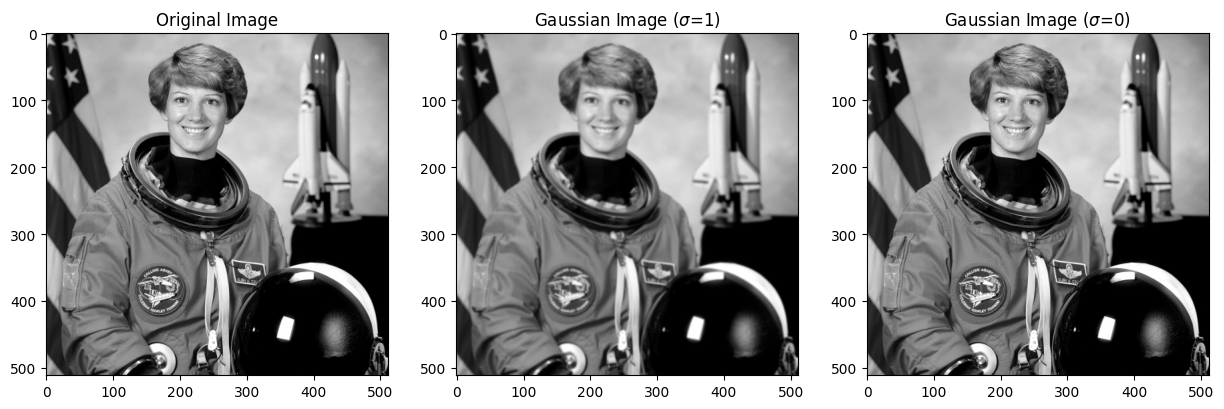

In [115]:
# solution
gaussian_astronaut_s0 = filters.gaussian(astronaut, sigma=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(astronaut, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gaussian_astronaut_s1, cmap='gray')
ax[1].set_title('Gaussian Image ($\sigma$=1)')
ax[2].imshow(gaussian_astronaut_s0, cmap='gray')
ax[2].set_title('Gaussian Image ($\sigma$=0)');

**Solution**: If you apply a Gaussian kernel with $\sigma=0$, everything far from the central pixel more than 0 units has 0 weight so the final result is the Identity operator applied to the image.

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

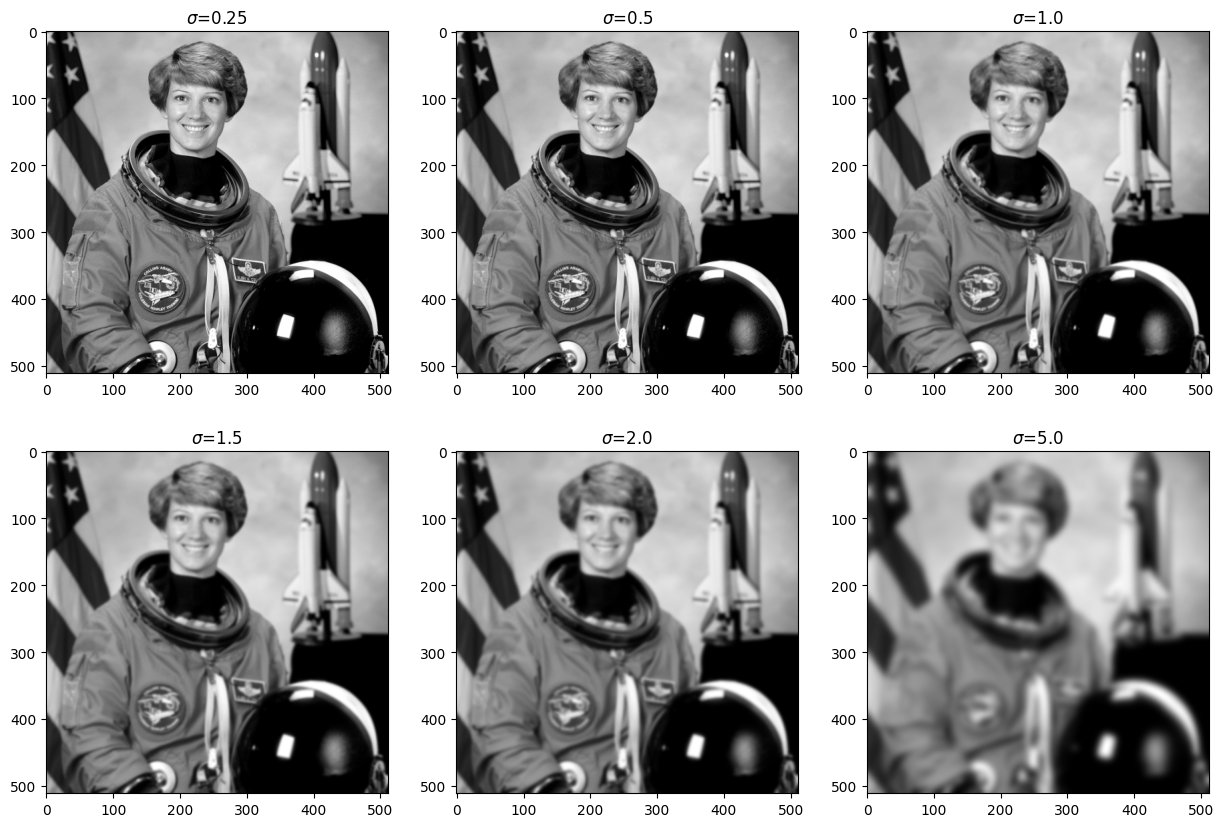

In [122]:
# solution

ls_sigmas = [.25, .5, 1., 1.5, 2., 5.]
fig, ax = plt.subplots(2, len(ls_sigmas) // 2, figsize=(15, 10))
ax = ax.ravel()
for i, sigma in enumerate(ls_sigmas):
    ax[i].imshow(filters.gaussian(astronaut, sigma=sigma), cmap='gray')
    ax[i].set_title('$\sigma$={}'.format(sigma))

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

Sigma measures the amount of smoothening applied.

When a larger sigma value is used, the higher is the contribution from each neighbor (higher weights) in the gaussian kernel and the more blur is obtained.

The optimal sigma value will depend on the amount of noise (high frequency components) that we want to remove. 

### Exercise: Median Filter
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

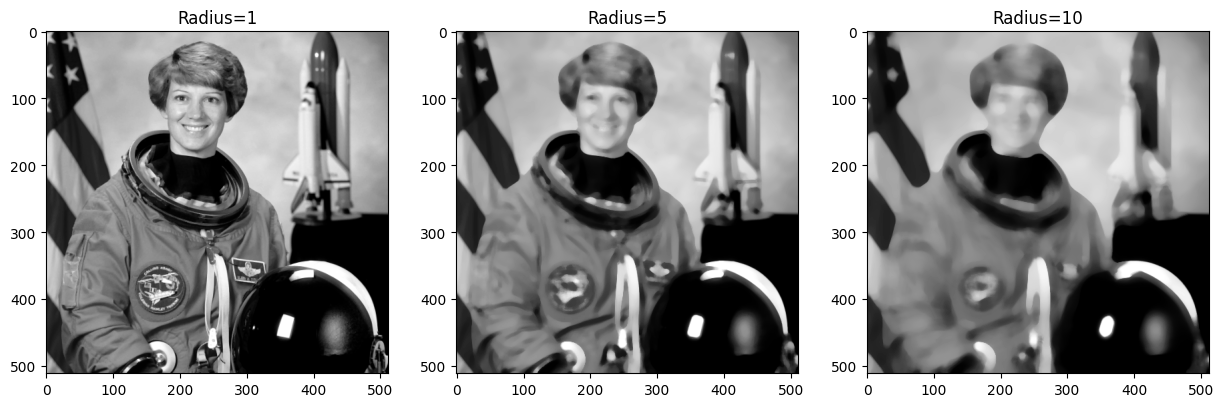

In [125]:
# solution

ls_radius = [1, 5, 10]
fig, ax = plt.subplots(1, len(ls_radius), figsize=(15, 5))

for i, radius in enumerate(ls_radius):
    selem = morphology.disk(radius)
    ax[i].imshow(filters.median(astronaut, selem), cmap='gray')
    ax[i].set_title('Radius={}'.format(radius))

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

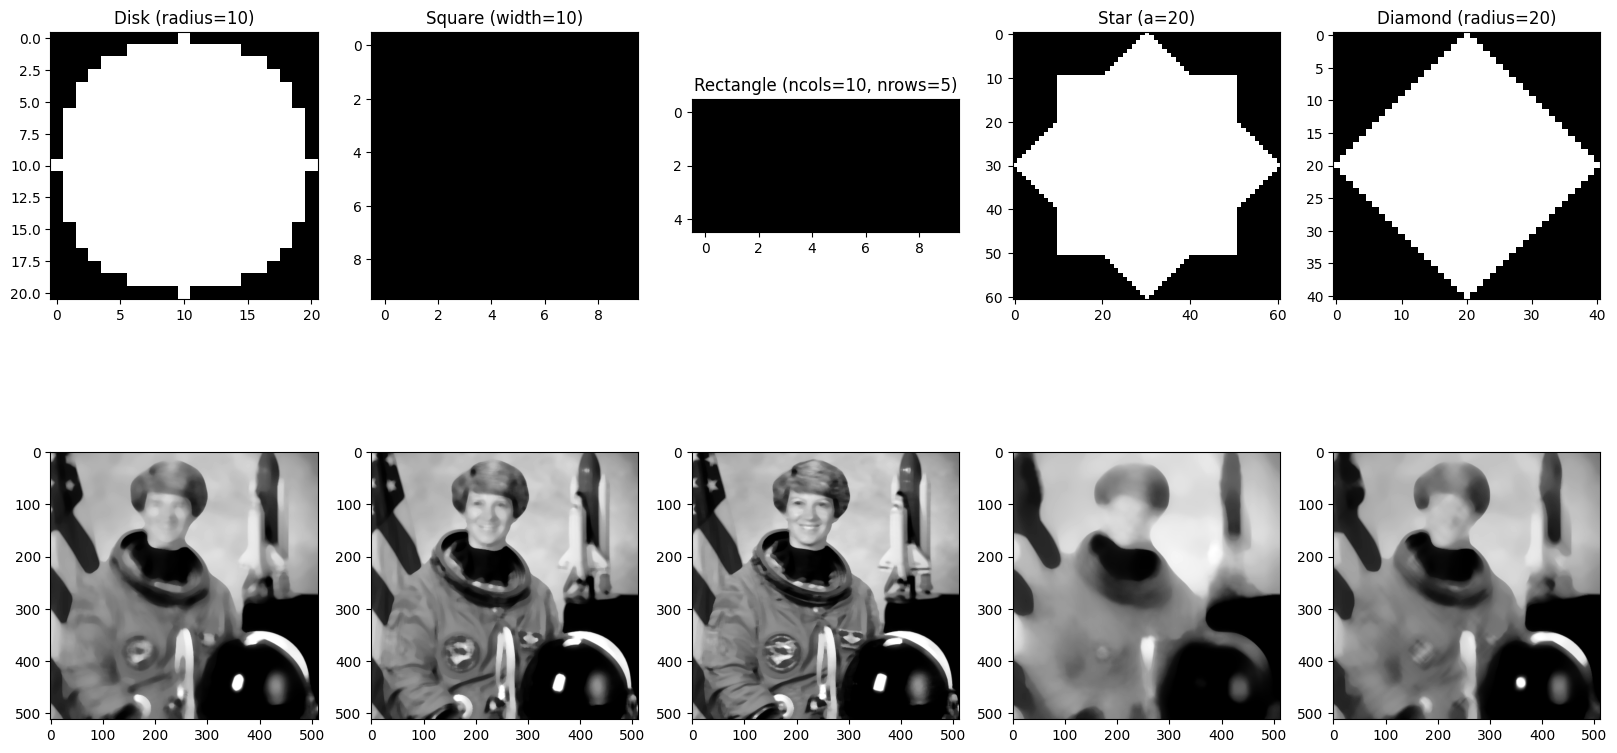

In [140]:
# solution

image = data.astronaut()
image = color.rgb2gray(image)

f, ax = plt.subplots(ncols=5, nrows=2,figsize=(20, 10))

selem = morphology.disk(radius=10)
img_fil = filters.median(image, selem)
ax[0,0].imshow(selem, cmap='gray')
ax[1,0].imshow(img_fil, cmap='gray')

selem = morphology.square(width=10)
img_fil = filters.median(image, selem)
ax[0,1].imshow(selem, cmap='gray')
ax[1,1].imshow(img_fil, cmap='gray')

selem = morphology.rectangle(ncols=10, nrows=5)
img_fil = filters.median(image, selem)
ax[0,2].imshow(selem, cmap='gray')
ax[1,2].imshow(img_fil, cmap='gray')

selem = morphology.star(a=20)
img_fil = filters.median(image, selem)
ax[0,3].imshow(selem, cmap='gray')
ax[1,3].imshow(img_fil, cmap='gray')

selem = morphology.diamond(radius=20)
img_fil = filters.median(image, selem)
ax[0,4].imshow(selem, cmap='gray')
ax[1,4].imshow(img_fil, cmap='gray')

ax[0,0].set_title('Disk (radius=10)')
ax[0,1].set_title('Square (width=10)')
ax[0,2].set_title('Rectangle (ncols=10, nrows=5)')
ax[0,3].set_title('Star (a=20)')
ax[0,4].set_title('Diamond (radius=20)')

plt.show()

*   What is the effect of the structuring element on the median filter?


**Solution**

The efect is resalting the edges and shape that match with the shape of the mask. For example, the diamond and star masks preserve better diagonal edges such as the flag stripes or astronaut shoulder. In the case of square and rectangle, the same happens but with horizontal and vertical edges.

Finally, the circular structure element makes the soft curves more visible (rounded symbol on the clothes, rounded shapes of the hair,...)

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

**Difference in calculation**: 
- Mean filter calculates image local average.
- Gaussian filter calculates local average as well but weighting each of the neighbors using a bell shaped function (gaussian function), giving more importance to the pixels near the center.
- Median filter calculates the image local median.

**Difference noise handling**:
- Mean filter is an easy and fast way to remove gaussian noise. This is because noise is supposed to have 0-mean so that avg(pixels + noise) = avg(pixels) + avg(noise) = avg(pixels). So that it cancels the efect of gaussian noise but blurs the image and isn't able to completely separate high and low frequency elements in the image.
- Gaussian filter also removes the effect of gaussian noise but it also yields a smoothest image (less blur and better defined edges). However, it is computationally more expensive and the smoothing parameter $\sigma$ must be tuned depending on the nature of our image.
- Median filter is the most appropiate one for the "salt and pepper" noise, i.e., the one corresponding to a situation where random	pixels get replaced	by extremely dark or bright values.

Text(0.5, 1.0, 'gaussian Filtered Image')

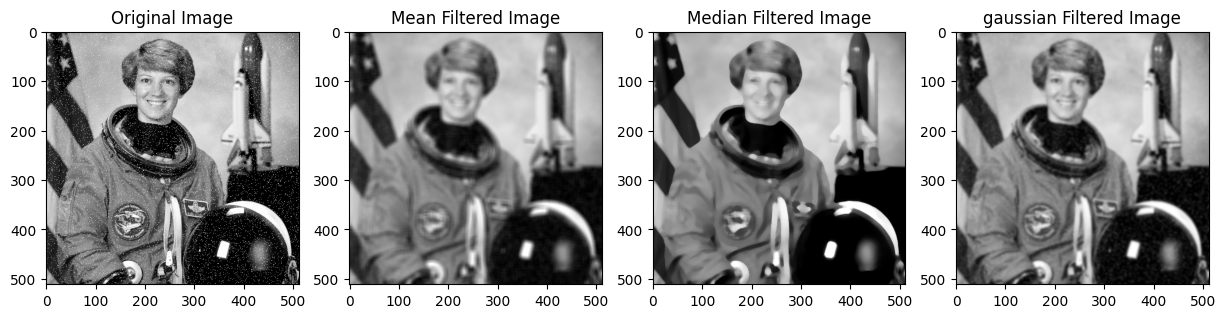

In [230]:
def gauss_noise(shape, mean=0, std=1):
    gauss_noise=np.zeros(shape, dtype=np.uint8)
    gauss_noise += (std * np.random.randn(*shape) + mean).astype(np.uint8)
    return gauss_noise

# Generate image with noise
image = data.astronaut()
image = color.rgb2gray(image)
image += gauss_noise(image.shape, mean=0, std=0.5)
image[image > 1.] = .9
image[image < 0.] = .1
# solution

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(filters.rank.mean(image, morphology.square(10)), cmap='gray')
ax[1].set_title('Mean Filtered Image')
ax[2].imshow(filters.rank.median(image, morphology.square(10)), cmap='gray')
ax[2].set_title('Median Filtered Image')
ax[3].imshow(filters.gaussian(image, 2), cmap='gray')
ax[3].set_title('gaussian Filtered Image')

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

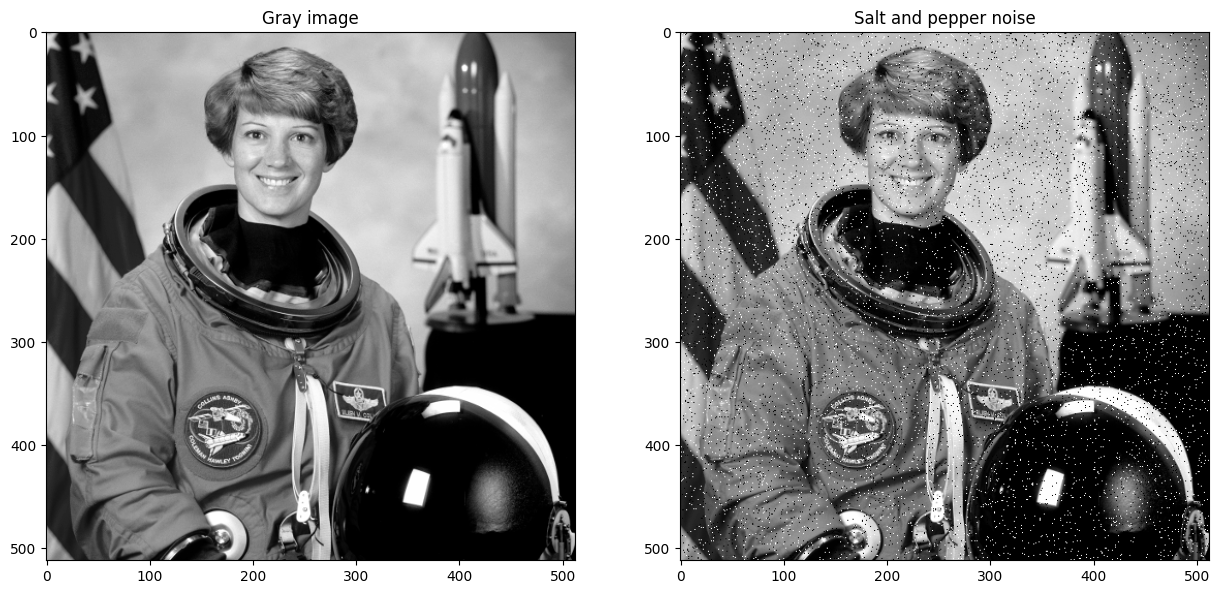

In [231]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/home/alberto/Documentos/GitHub/UPC_MasterArtificialIntelligence/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


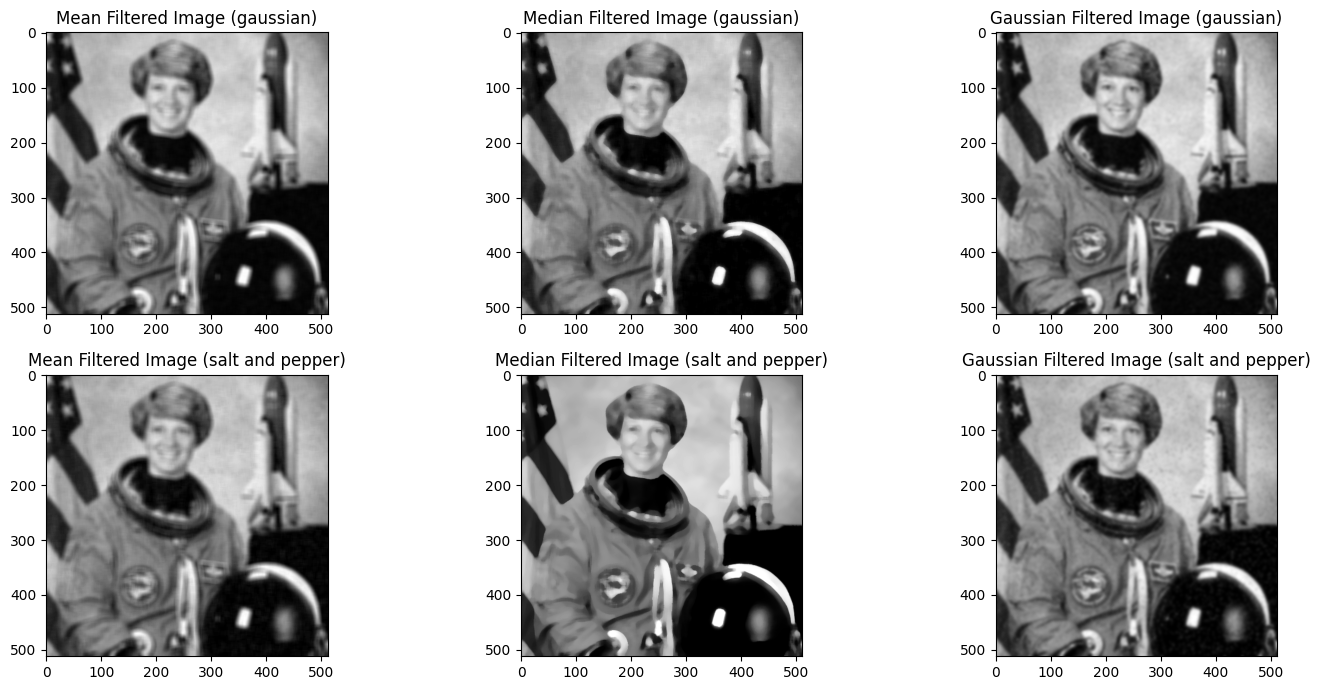

In [242]:
# solution

image = data.astronaut()
image = color.rgb2gray(image)

img_sp_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added
img_gauss_noise = random_noise(image, mode='gaussian')  # gaussian noise is added

selem = morphology.square(width=10)
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))
ax[0, 0].imshow(filters.rank.mean(img_gauss_noise, selem), cmap='gray')
ax[0, 0].set_title('Mean Filtered Image (gaussian)')
ax[0, 1].imshow(filters.rank.median(img_gauss_noise, selem), cmap='gray')
ax[0, 1].set_title('Median Filtered Image (gaussian)')
ax[0, 2].imshow(filters.gaussian(img_gauss_noise, sigma=2.5), cmap='gray')
ax[0, 2].set_title('Gaussian Filtered Image (gaussian)')
ax[1, 0].imshow(filters.rank.mean(img_sp_noise, selem), cmap='gray')
ax[1, 0].set_title('Mean Filtered Image (salt and pepper)')
ax[1, 1].imshow(filters.rank.median(img_sp_noise, selem), cmap='gray')
ax[1, 1].set_title('Median Filtered Image (salt and pepper)')
ax[1, 2].imshow(filters.gaussian(img_sp_noise, sigma=2.5), cmap='gray')
ax[1, 2].set_title('Gaussian Filtered Image (salt and pepper)')

fig.tight_layout()
plt.show()


*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

As expected, all of them were able to reduce Gaussian noise, but the filter which better preserved the edges was the gaussian one. However, none of them could completely get rid of the noise.

In the other hand, for the salt and pepper noise, the median filter completely beats the rest of them.

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

Text(0.5, 1.0, 'Enhanced Image')

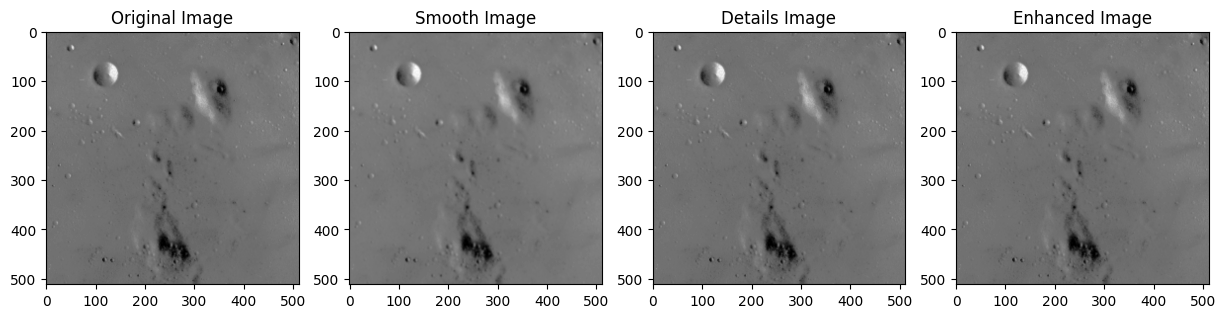

In [248]:
# solution
def sharp_enhancer(image, blurred, amount):
    return image + amount*(image - blurred)

moon = data.moon()
# moon = color.rgb2gray(moon)
smooth_moon = filters.gaussian(moon, sigma=1)
details_moon = moon - smooth_moon
enhanced_moon = sharp_enhancer(moon, smooth_moon, 1)

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(moon, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(smooth_moon, cmap='gray')
ax[1].set_title('Smooth Image')
ax[2].imshow(details_moon, cmap='gray')
ax[2].set_title('Details Image')
ax[3].imshow(enhanced_moon, cmap='gray')
ax[3].set_title('Enhanced Image')



*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

In [ ]:
# solution



# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

In [ ]:
# solution




*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

*(Double-click or enter to edit)*

...

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

In [ ]:
# solution



*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

*(Double-click or enter to edit)*

...

*   What is the algorithm behind the Canny operator?


**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Thursday, the 16th of October, 2022**
